## Serial case (1 dimensional)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import _lib.pr_func as pr
from _lib.utility import *

In [2]:
# dimensions
N,M,K = 20,10,20
pr.set_dims([('w',N),('x',M),('a',K)])

# environment
U = pr.func(vars=['w','a'],val=gauss_utility(N,K,sigma=2.0))
pw = pr.func(vars=['w'],val='rnd')

# Lagrange multipliers
beta = 100.0    # first step, p(x) -> p(x|w)
gamma = 90.0    # second step, p(a) -> p(a|x)

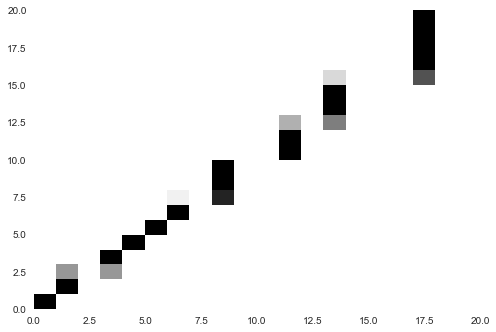

In [3]:
# initializations
pw = pr.func(vars=['w'], val='unif').normalize()
px = pr.func(vars=['x'], val='unif').normalize()
pa = pr.func(vars=['a'], val='unif').normalize()
F = pr.func('f(w,x)', val='rnd')
pxgw_temp = 0

# BA iteration
for i in range(0,10000):
    pxgw = (px*pr.exp(beta*F)).normalize(['x'])
    px = pr.sum(pw*pxgw,['w'])
    pwgx = (pxgw*pw)/px
    pagx = (pa*pr.exp(gamma*pr.sum(pwgx*U,['w']))).normalize(['a'])
    pa = pr.sum(pxgw*pw*pagx,['w','x'])
    F = pr.sum(pagx*(U-pr.log(pagx/pa)/gamma),['a'])
    # stopping condition
    if np.linalg.norm(pxgw.val-pxgw_temp)<1e-10: break
    pxgw_temp = pxgw.val


# calc and plot p(a|w)    
pagw = pr.sum(pxgw*pagx,['x'])
plt.pcolor(pagw.val)
plt.show()